### 앙상블
* 여러 머신러닝 모델을 연결해서 더 강력한 모델을 만든다.
* 랜덤 포레스트(RandomForest)와 그래디언트부스팅(GradientBoosting)

### 데이터를 다운로드 후
* 여러분의 코드 위치 또는 코드 위치레 폴더를 만들어서 넣는다.

In [1]:
# sklearn은 크기가 커서 보통 from으로 불러온다.

from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import pandas as pd

train = pd.read_csv("./data/house_data/train.csv")
test = pd.read_csv("./data/house_data/test.csv")
sub = pd.read_csv("./data/house_data/sample_submission.csv")

In [3]:
train.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [4]:
test.columns

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


In [6]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [7]:
train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15035 non-null  int64  
 1   date           15035 non-null  object 
 2   price          15035 non-null  float64
 3   bedrooms       15035 non-null  int64  
 4   bathrooms      15035 non-null  float64
 5   sqft_living    15035 non-null  int64  
 6   sqft_lot       15035 non-null  int64  
 7   floors         15035 non-null  float64
 8   waterfront     15035 non-null  int64  
 9   view           15035 non-null  int64  
 10  condition      15035 non-null  int64  
 11  grade          15035 non-null  int64  
 12  sqft_above     15035 non-null  int64  
 13  sqft_basement  15035 non-null  int64  
 14  yr_built       15035 non-null  int64  
 15  yr_renovated   15035 non-null  int64  
 16  zipcode        15035 non-null  int64  
 17  lat            15035 non-null  float64
 18  long  

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6555 entries, 0 to 6554
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             6555 non-null   int64  
 1   date           6555 non-null   object 
 2   bedrooms       6555 non-null   int64  
 3   bathrooms      6555 non-null   float64
 4   sqft_living    6555 non-null   int64  
 5   sqft_lot       6555 non-null   int64  
 6   floors         6555 non-null   float64
 7   waterfront     6555 non-null   int64  
 8   view           6555 non-null   int64  
 9   condition      6555 non-null   int64  
 10  grade          6555 non-null   int64  
 11  sqft_above     6555 non-null   int64  
 12  sqft_basement  6555 non-null   int64  
 13  yr_built       6555 non-null   int64  
 14  yr_renovated   6555 non-null   int64  
 15  zipcode        6555 non-null   int64  
 16  lat            6555 non-null   float64
 17  long           6555 non-null   float64
 18  sqft_liv

* 'price'는 train 데이터에만 있다.
* train 데이터는 21개의 column으로 test 데이터는 20개의 column으로 이루어졌다.
* train 데이터는 15035개의 데이터, test 데이터는 6555의 데이터로 이루어졌다.
* 결측치가 없는 데이터이다.

In [10]:
X_all = train.drop(['price' ], axis=1 )
y = train['price']

print(X_all.shape, y.shape)

(15035, 20) (15035,)


In [11]:
train.corr() # 상관계수 확인

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,0.020899,0.010520,0.104030,0.041725,-0.034077,0.182848,-0.011775,-0.024360,-0.101618,0.078622,0.073086,-0.050634,0.202477,-0.029810,-0.005761,0.002588,0.014757,0.029248,-0.032269
price,0.020899,1.000000,0.323672,0.525479,0.702899,0.096793,0.262588,0.265738,0.400806,0.039740,0.667211,0.608577,0.322218,0.047290,0.140808,-0.051498,0.301604,0.023547,0.586419,0.086384
bedrooms,0.010520,0.323672,1.000000,0.530548,0.596974,0.033475,0.189532,-0.004819,0.085703,0.034885,0.375286,0.494867,0.315183,0.158799,0.022729,-0.162081,-0.011190,0.135802,0.407394,0.027242
bathrooms,0.104030,0.525479,0.530548,1.000000,0.755853,0.089308,0.508649,0.075452,0.187488,-0.125907,0.666278,0.688255,0.282642,0.503964,0.065423,-0.207500,0.018110,0.227669,0.573541,0.088120
sqft_living,0.041725,0.702899,0.596974,0.755853,1.000000,0.176500,0.363193,0.108137,0.282821,-0.054213,0.762543,0.878736,0.434017,0.315927,0.064893,-0.200745,0.051609,0.245429,0.760271,0.184176
sqft_lot,-0.034077,0.096793,0.033475,0.089308,0.176500,1.000000,0.001535,0.025584,0.080441,-0.002099,0.119906,0.186242,0.017818,0.058686,-0.001451,-0.127709,-0.082234,0.227451,0.147562,0.728458
floors,0.182848,0.262588,0.189532,0.508649,0.363193,0.001535,1.000000,0.031159,0.034511,-0.261016,0.462598,0.529476,-0.239350,0.490436,0.009752,-0.059107,0.049004,0.126983,0.287125,-0.010287
waterfront,-0.011775,0.265738,-0.004819,0.075452,0.108137,0.025584,0.031159,1.000000,0.389669,0.011613,0.088061,0.081968,0.071576,-0.026523,0.104168,0.028632,-0.014772,-0.037922,0.091810,0.028255
view,-0.024360,0.400806,0.085703,0.187488,0.282821,0.080441,0.034511,0.389669,1.000000,0.045255,0.247924,0.172693,0.265880,-0.061670,0.107605,0.089247,0.005285,-0.073151,0.278267,0.076501
condition,-0.101618,0.039740,0.034885,-0.125907,-0.054213,-0.002099,-0.261016,0.011613,0.045255,1.000000,-0.143599,-0.152856,0.175064,-0.366590,-0.062342,0.001106,-0.015974,-0.110742,-0.091407,-0.003873


In [13]:
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

In [14]:
sel = ['bedrooms', 'bathrooms', 'sqft_living', 'view', 'grade']
X = X_all[sel]
y = train['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   random_state=0)

In [15]:
model = KNeighborsRegressor()
model.fit(X_train, y_train)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.6889315379646785
0.49202844461306783


In [16]:
model = RandomForestRegressor().fit(X_train, y_train)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.8994613889275814
0.5743510509903411


In [17]:
model = GradientBoostingRegressor().fit(X_train, y_train)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.7176281374755552
0.6421187189793995


In [20]:
lr_rate = [0.1, 0.05, 0.1, 0.005, 0.001 ]
depth_num = range(1, 15, 1)

for lr in lr_rate:
    for num in depth_num:
        model = GradientBoostingRegressor().fit(X_train, y_train)
        
        print("learning rate, max_depth ", lr, num)
        print(model.score(X_train, y_train))
        print(model.score(X_test, y_test))
        print()

learning rate, max_depth  0.1 1
0.7176281374755552
0.6421743525996493

learning rate, max_depth  0.1 2
0.7176281374755552
0.6421214590349433

learning rate, max_depth  0.1 3
0.7176281374755553
0.6421214590349433

learning rate, max_depth  0.1 4
0.7176281374755553
0.6417940627587753

learning rate, max_depth  0.1 5
0.7176281374755552
0.6421870088964545

learning rate, max_depth  0.1 6
0.7176281374755552
0.6417913227032315

learning rate, max_depth  0.1 7
0.7176281374755552
0.6417940627587753

learning rate, max_depth  0.1 8
0.7176281374755553
0.6418649623183931

learning rate, max_depth  0.1 9
0.7176281374755552
0.6419331377034365

learning rate, max_depth  0.1 10
0.7176281374755552
0.6417940627587753

learning rate, max_depth  0.1 11
0.7176281374755552
0.641877504083187

learning rate, max_depth  0.1 12
0.7176281374755552
0.6417730803511209

learning rate, max_depth  0.1 13
0.7176281374755552
0.641110092883971

learning rate, max_depth  0.1 14
0.7176281374755552
0.6421214590349433

lea

In [21]:
model = GradientBoostingRegressor(max_depth=4, learning_rate=0.1).fit(X_train, y_train)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.7414152354839403
0.6449338741624913


In [22]:
model.feature_importances_

array([0.01530747, 0.04649075, 0.39802818, 0.06204633, 0.47812728])

In [23]:
# model : 모델
# n_features : feature(변수의 개수)
# feature_names : 특성의 이름
def plot_feature_important_up(model, n_features, feature_names):
  imp = model.feature_importances_     # feature의 중요도 
  plt.barh(range(n_features) , imp, align='center')  # 그래프(가로 막대 그래프)
  plt.yticks(np.arange(n_features), feature_names)  #y축의 축의 값
  plt.xlabel("feature importance")   # x축 레이블(제목)
  plt.ylabel("feature")              # y축 제목
  plt.ylim(-1, n_features)           # y축의 범위 지정 

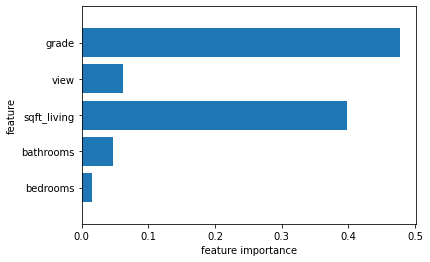

In [24]:
feature_names = sel   #  선택된 피처의 이름
n_features = X.shape[1]  # 선택된 피처의 개수
plot_feature_important_up(model, n_features, feature_names) # 피처의 중요도 확인

In [25]:
# 유방암 데이터 셋 불러오기

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [28]:
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

X.shape, y.shape

((569, 30), (569,))

In [29]:
# 데이터 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size = 0.3,
                                                   random_state=0)

In [31]:
# 기본 모델 만들어보기
model = RandomForestClassifier()
model.fit(X_train, y_train)

print("학습용 점수 : ", model.score(X_train, y_train))
print("테스트용 점수: ", model.score(X_test, y_test))

학습용 점수 :  1.0
테스트용 점수:  0.9707602339181286


In [32]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)

print("학습용 점수 : ", model.score(X_train, y_train))
print("테스트용 점수: ", model.score(X_test, y_test))

학습용 점수 :  0.9396984924623115
테스트용 점수:  0.9473684210526315


In [34]:
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

print("학습용 점수 : ", model.score(X_train, y_train))
print("테스트용 점수: ", model.score(X_test, y_test))

학습용 점수 :  1.0
테스트용 점수:  0.9649122807017544


* RandomForestClassifier
  - 학습용 점수 :  1.0
  - 테스트용 점수:  0.9707602339181286
    
* KNeighborsClassifier
  - 학습용 점수 :  0.9396984924623115
  - 테스트용 점수:  0.9473684210526315

* GradientBoostingClassifier
  - 학습용 점수 :  1.0
  - 테스트용 점수:  0.9649122807017544

* 확인결과 CLASS CODE에서는 GradientBoostin이, MY CODE에서는 RandomForest가 높게 나왔다.
* 이에 파이퍼 파라미터를 변경해서 보면서 최적화 파라미터를 찾아보자.

In [35]:
lr_rate = [0.1, 0.05, 0.01, 0.005, 0.001]
depth_num = range(1, 15, 1)

for lr in lr_rate:
    for num in depth_num:
        model = GradientBoostingClassifier(learning_rate=lr, max_depth=num, random_state=0).fit(X_train, y_train)

        print("learning rate, max_depth ", lr, num)
        print(model.score(X_train, y_train))
        print(model.score(X_test, y_test))
        print()

learning rate, max_depth  0.1 1
0.9899497487437185
0.9532163742690059

learning rate, max_depth  0.1 2
1.0
0.9649122807017544

learning rate, max_depth  0.1 3
1.0
0.9766081871345029

learning rate, max_depth  0.1 4
1.0
0.9590643274853801

learning rate, max_depth  0.1 5
1.0
0.9005847953216374

learning rate, max_depth  0.1 6
1.0
0.9298245614035088

learning rate, max_depth  0.1 7
1.0
0.935672514619883

learning rate, max_depth  0.1 8
1.0
0.9239766081871345

learning rate, max_depth  0.1 9
1.0
0.9239766081871345

learning rate, max_depth  0.1 10
1.0
0.9239766081871345

learning rate, max_depth  0.1 11
1.0
0.9239766081871345

learning rate, max_depth  0.1 12
1.0
0.9298245614035088

learning rate, max_depth  0.1 13
1.0
0.9239766081871345

learning rate, max_depth  0.1 14
1.0
0.9239766081871345

learning rate, max_depth  0.05 1
0.9798994974874372
0.9532163742690059

learning rate, max_depth  0.05 2
0.9949748743718593
0.9473684210526315

learning rate, max_depth  0.05 3
1.0
0.96491228070175

In [36]:
# n_features : 변수의 개수
# feature_names : 변수의 이름 
# model : 모델 
def plot_feature_important_up(model, n_features, feature_names):
  imp = model.feature_importances_     # feature의 중요도 
  plt.barh(range(n_features) , imp, align='center')  # 그래프(가로 막대 그래프)
  plt.yticks(np.arange(n_features), feature_names)  #y축의 축의 값
  plt.xlabel("feature importance")   # x축 레이블(제목)
  plt.ylabel("feature")              # y축 제목
  plt.ylim(-1, n_features)           # y축의 범위 지정 

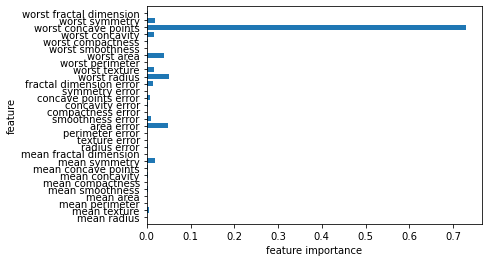

In [37]:
feature_num = X_train.shape[1]
feature_names = cancer.feature_names

plot_feature_important_up(model, feature_num, feature_names)

In [38]:
import pandas as pd
data = {'eng' : ['b', 'c', 'a', 'd']}
df = pd.DataFrame(data)
print(type(df))
df

<class 'pandas.core.frame.DataFrame'>


,eng
0,b
1,c
2,a
3,d


In [39]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [40]:
en_x = LabelEncoder()
df['eng_label'] = en_x.fit_transform(df['eng'])
df

,eng,eng_label
0,b,1
1,c,2
2,a,0
3,d,3


In [41]:
df['eng_label'].values.reshape(-1, 1)

array([[1],
       [2],
       [0],
       [3]])

In [44]:
onehot = OneHotEncoder()
val = df['eng_label'].values.reshape(-1, 1)
y = onehot.fit_transform( val ).toarray()
y

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.]])

In [45]:
onehot_val = pd.DataFrame(y, dtype=int)
df_new = pd.concat([df, onehot_val], axis=1)
df_new

,eng,eng_label,0,1,2,3
0,b,1,0,1,0,0
1,c,2,0,0,1,0
2,a,0,1,0,0,0
3,d,3,0,0,0,1


In [47]:
data = {'회사명' : ["MS", "Apple", "Google", "Goorm"]}
df1 = pd.DataFrame(data)
print(type(df1))
df1

<class 'pandas.core.frame.DataFrame'>


,회사명
0,MS
1,Apple
2,Google
3,Goorm


In [48]:
lbl_en = LabelEncoder()
df1['회사명_en'] = lbl_en.fit_transform(data['회사명'])
df1

,회사명,회사명_en
0,MS,3
1,Apple,0
2,Google,1
3,Goorm,2


In [50]:
onehot_en = OneHotEncoder()

# 데이터 변경
val = df1['회사명_en'].values.reshape(-1, 1)
y = onehot_en.fit_transform( val ).toarray()
onehot_val = pd.DataFrame(y, dtype=int)
df_new = pd.concat([df1, onehot_val], axis=1)
df_new

,회사명,회사명_en,0,1,2,3
0,MS,3,0,0,0,1
1,Apple,0,1,0,0,0
2,Google,1,0,1,0,0
3,Goorm,2,0,0,1,0
